In [72]:
import  matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
%matplotlib inline

In [73]:
data = pd.read_csv(r"C:\Users\HP1\Desktop\ML files\my2024-fuel-consumption-ratings.csv", encoding='ISO-8859-1')
data.head()


,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Fuel consumption(L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [74]:
data.describe()


,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Fuel consumption(L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,2024.0,3.086198,5.541667,12.410417,9.432552,11.071224,27.332031,259.190104,4.479167,5.497396
std,0.0,1.268500,1.891678,3.392118,2.303873,2.845196,7.710060,64.902216,1.304723,1.607510
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,3.000000,6.000000,12.250000,9.300000,11.000000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.825000,12.800000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


In [75]:
# rename columns
data = data.rename(columns={
    'Engine size (L)':'Engine size',
    'Fuel consumption(L/100 km)':'Fuel consumption',
    'CO2 emissions (g/km)':'emissions',
    'Cylinders':'Cylinder'    
})
data.head()

,Model year,Make,Model,Vehicle class,Engine size,Cylinder,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Fuel consumption,Combined (mpg),emissions,CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [76]:
to_use = data[['Cylinder', 'Fuel consumption','emissions',"Engine size"]]
to_use 

,Cylinder,Fuel consumption,emissions,Engine size
0,4,7.4,172,1.5
1,4,7.8,181,1.5
2,4,9.9,230,2.0
3,6,11.2,263,3.5
4,6,12.4,291,3.0
...,...,...,...,...
763,4,8.9,207,2.0
764,4,9.5,223,2.0
765,4,9.0,210,2.0
766,4,9.6,226,2.0


In [77]:
to_use.describe()

,Cylinder,Fuel consumption,emissions,Engine size
count,768.000000,768.000000,768.000000,768.000000
mean,5.541667,11.071224,259.190104,3.086198
std,1.891678,2.845196,64.902216,1.268500
min,3.000000,4.400000,104.000000,1.200000
25%,4.000000,9.000000,210.000000,2.000000
50%,6.000000,11.000000,260.000000,3.000000
75%,6.000000,12.800000,299.000000,3.600000
max,16.000000,26.100000,608.000000,8.000000


In [78]:
#target
y = to_use["emissions"]
#feature
x = to_use["Engine size"]



In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
# Importing model
from sklearn.linear_model import LinearRegression

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

#Initializing model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

In [83]:
# Making Predictions 
y_pred = model.predict(x_test)
y_pred


array([405.1835366 , 215.79639007, 256.09152763, 296.38666519,
       256.09152763, 280.26861017, 215.79639007, 276.23909641,
       215.79639007, 385.03596782, 405.1835366 , 397.12450909,
       187.58979378, 336.68180275, 215.79639007, 235.94395885,
       235.94395885, 231.9144451 , 296.38666519, 397.12450909,
       296.38666519, 256.09152763, 312.50472021, 364.88839904,
       244.00298636, 393.09499533, 288.32763768, 296.38666519,
       195.64882129, 336.68180275, 244.00298636, 256.09152763,
       296.38666519, 348.77034402, 215.79639007, 276.23909641,
       288.32763768, 215.79639007, 288.32763768, 256.09152763,
       256.09152763, 231.9144451 , 215.79639007, 296.38666519,
       215.79639007, 215.79639007, 252.06201387, 256.09152763,
       348.77034402, 256.09152763, 256.09152763, 215.79639007,
       336.68180275, 276.23909641, 215.79639007, 244.00298636,
       199.67833505, 235.94395885, 235.94395885, 215.79639007,
       195.64882129, 215.79639007, 215.79639007, 276.23

In [92]:
# Evalute the model
from sklearn.metrics import mean_squared_error, r2_score    
mse = mean_squared_error(y_test, y_pred)
print(mse)

1414.8591392924711


In [93]:
rmse = np.sqrt(mse)
rmse

np.float64(37.6146133742256)

In [94]:
rsq = model.score(x_test, y_test)
rsq

0.6523736634116307

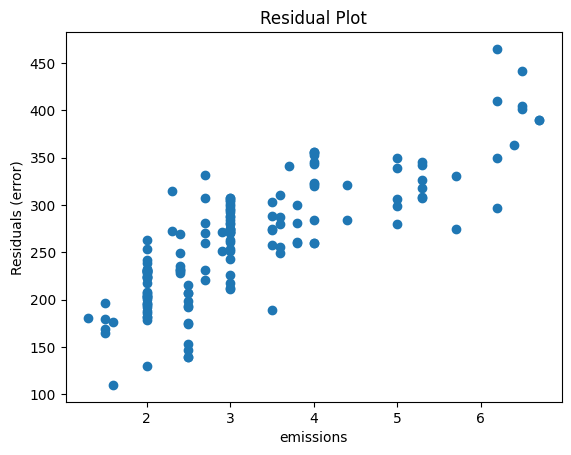

In [95]:
import matplotlib.pyplot as plt 

plt.scatter(x_test, y_test,)
plt.xlabel("emissions")
plt.ylabel("Residuals (error)")   
plt.title("Residual Plot")
plt.show()  